# **Part 1**

# **Unzip the Dataset**
Unzip the downloaded zip file.

# **download the Dataset**
Save the extracted files to `CICIDS2017` folder.

There are eight files extracted from this zip file.


1.  `Monday-WorkingHours.pcap_ISCX.csv`
2.  `Tuesday-WorkingHours.pcap_ISCX.csv`
3.  `Wednesday-workingHours.pcap_ISCX.csv`
4.  `Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv`
5.  `Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv`
6.  `Friday-WorkingHours-Morning.pcap_ISCX.csv`
7.  `Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv`
8.  `Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv`

# **Part 2**

**2.1 Dataset Characteristics and EDA**

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

sns.set(style='darkgrid')
import matplotlib.pyplot as plt

# Define the relative path to the CICIDS2017 folder
base_path = os.path.join(os.getcwd(), "CICIDS2017")


data1_path = os.path.join(base_path, "Wednesday-workingHours.pcap_ISCX.csv")
data2_path = os.path.join(base_path, "Tuesday-WorkingHours.pcap_ISCX.csv")
data3_path = os.path.join(base_path, "Wednesday-workingHours.pcap_ISCX.csv")
data4_path = os.path.join(base_path, "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
data5_path = os.path.join(base_path, "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
data6_path = os.path.join(base_path, "Friday-WorkingHours-Morning.pcap_ISCX.csv")
data7_path = os.path.join(base_path, "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
data8_path = os.path.join(base_path, "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

# Loading the datasets
try:
    data1 = pd.read_csv(data1_path)
    data2 = pd.read_csv(data2_path)
    data3 = pd.read_csv(data3_path)
    data4 = pd.read_csv(data4_path)
    data5 = pd.read_csv(data5_path)
    data6 = pd.read_csv(data6_path)
    data7 = pd.read_csv(data7_path)
    data8 = pd.read_csv(data8_path)

    data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

    print('Data dimensions: ')
    for i, data in enumerate(data_list, start=1):
        rows, cols = data.shape
        print(f'Data{i} -> {rows} rows, {cols} columns')

except FileNotFoundError as e:
    print(f"Error: One or more data files were not found.  Please check the file paths.")
    print(f"Specific error: {e}")
    print(f"Current working directory: {os.getcwd()}")  # Added this line
    print(f"Ensure that the 'CICIDS2017' folder is in the correct location.")



Data dimensions: 
Data1 -> 692703 rows, 79 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 286467 rows, 79 columns
Data8 -> 225745 rows, 79 columns


In [3]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2993528
Number of columns: 79
Total cells: 236488712


In [4]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [5]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993528 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  F

In [7]:
pd.options.display.max_columns = 80
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.132505e+02,52.208416,38308.000000,0.000000,38308,38308,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,26.104208,26.104208,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1.039666e+06,33402.922760,31.933333,25.510409,73,0,479,47.900000,38.942836,109,1,401,100.250000,101.736178,237,3,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3195.595588,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5.753425e+06,14611.872150,73.000000,204.960972,810,1,1095,121.666667,298.746130,915,1,995,199.000000,345.535092,810,3,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,451250.132400,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,3069,0,555.000000,977.480342,6.650007e+05,1907.141918,543.071429,2519.931377,13391,0,15206,950.375000,3322.417812,13391,2,15112,1373.818182,4176.449588,13961,3,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,496537.374700,0,0,0,1,0,0,0,0,0,348.689655,203.058823,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.771062e+06,13736.263740,78.000000,207.000929,794,1,1092,136.500000,313.850738,910,1,1015,203.000000,333.240154,794,3,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,496440.116700,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,1.967213e+05,32786.885250,61.000000,0.000000,61,61,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,16393.442620,16393.442620,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.00

**2.2 Data Cleaning**

In [8]:
# Identifying duplicate values
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

data.drop_duplicates(inplace = True)
data.shape

Number of duplicates: 973798


(2019730, 79)

From the data description, we identified that the dataset has infinity values. So, we checked and replaced the positive or negative infinity values with NaN (not a number) and counted it as a missing value. In the dataset, two features, FlowBytes/s, and Flow Packets/s contain missing values. For both columns, the number of missing values is 1564 which is 0.06% of total values.

In [9]:
# Identifying Missing Values
missing_val = data.isna().sum()

# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()

# Replacing any infinite values (positive or negative) with NaN (not a number)
data.replace([np.inf, -np.inf], np.nan, inplace = True)
missing = data.isna().sum()

# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

The first step is to identify duplicate rows and missing or invalid values. We identified and dropped the duplicate rows (308381 rows). From the data description, we identified that the dataset has infinity values. So, we checked and replaced the positive or negative infinity values with NaN (not a number) and counted it as a missing value. In the dataset, two features, FlowBytes/s, and Flow Packets/s contain missing values.

Flow Bytes/s and Flow Packets/s are continuous variables. The data is not normally distributed. The variables have extreme values or outliers. So, our strategy is to fill in missing values with median value. Because, filling the missing values with the median does not introduce any new categories or disrupt the distribution of the data.

**Visualization of column correlation. Also, plotting Heat Map**

In [10]:
data['Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed', 'FTP-Patator', 'SSH-Patator',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [11]:
# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

BENIGN                        1593852
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

We mapped each label to the corresponding attack type. This groups similar attacks together and provides an easier and more interpretable way to analyze the dataset and identify patterns in the different types of attacks.

In [12]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

In [13]:
data['Attack Type'].value_counts()

BENIGN          1593852
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: Attack Type, dtype: int64

In [14]:
data.drop('Label', axis = 1, inplace = True)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 4 5 2 8 6 1 7 3]


In [16]:
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [17]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Number
Destination Port,1.00,-0.17,-0.00,-0.00,0.02,-0.00,0.14,-0.02,0.19,0.17,-0.22,-0.25,-0.24,-0.20,0.07,0.34,-0.11,-0.13,-0.13,-0.02,-0.17,-0.11,-0.11,-0.13,-0.05,-0.11,-0.07,-0.03,-0.04,-0.05,0.21,nan,0.01,nan,0.00,0.00,0.33,0.14,-0.24,-0.13,-0.16,-0.13,-0.08,-0.03,0.21,-0.01,-0.20,0.54,0.53,0.01,-0.01,0.06,-0.16,0.19,-0.24,0.00,nan,nan,nan,nan,nan,nan,-0.00,0.02,-0.00,-0.00,-0.12,0.16,-0.00,0.00,-0.04,-0.05,-0.05,-0.02,-0.13,0.02,-0.12,-0.13,-0.13
Flow Duration,-0.17,1.00,0.02,0.02,0.06,0.02,0.26,-0.11,0.13,0.22,0.49,-0.25,0.46,0.44,-0.03,-0.11,0.56,0.76,0.80,0.05,1.00,0.56,0.74,0.80,0.19,0.79,0.40,0.51,0.57,0.20,-0.02,nan,-0.00,nan,0.00,-0.00,-0.10,-0.08,-0.26,0.51,0.43,0.45,0.28,0.25,-0.02,0.01,0.13,0.07,-0.12,-0.00,0.01,-0.18,0.40,0.13,0.46,0.00,nan,nan,nan,nan,nan,nan,0.02,0.06,0.02,0.02,0.09,-0.03,0.01,-0.00,0.18,0.23,0.28,0.12,0.78,0.24,0.79,0.75,0.22
Total Fwd Packets,-0.00,0.02,1.00,1.00,0.30,1.00,0.01,-0.00,-0.00,0.00,0.02,-0.01,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,0.00,0.00,-0.00,0.00,nan,-0.00,nan,0.00,0.01,-0.00,-0.00,-0.01,0.02,0.02,0.01,0.00,-0.00,0.00,0.00,0.01,0.00,-0.00,-0.00,0.00,0.00,0.02,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,1.00,0.30,1.00,1.00,0.00,-0.00,0.84,-0.00,0.03,0.01,0.02,0.02,0.00,0.00,0.00,0.00,-0.00
Total Backward Packets,-0.00,0.02,1.00,1.00,0.29,0.99,0.01,-0.00,-0.00,0.00,0.02,-0.01,0.02,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,0.00,0.00,-0.00,0.00,nan,-0.00,nan,0.00,0.01,-0.00,-0.00,-0.01,0.02,0.02,0.01,0.00,-0.00,0.00,0.00,0.01,0.00,-0.00,-0.00,0.00,0.00,0.02,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,1.00,0.29,1.00,0.99,0.00,-0.00,0.84,0.00,0.02,0.01,0.02,0.02,0.00,0.00,0.00,0.00,-0.00
Total Length of Fwd Packets,0.02,0.06,0.30,0.29,1.00,0.29,0.19,-0.00,0.18,0.15,0.01,-0.03,0.01,0.00,0.00,-0.01,0.00,0.01,0.02,-0.00,0.06,0.01,0.02,0.02,-0.01,0.07,0.01,0.03,0.04,-0.00,0.01,nan,-0.00,nan,-0.00,0.00,-0.01,-0.01,-0.03,0.07,0.07,0.05,0.03,-0.01,0.01,0.00,0.04,0.00,-0.00,-0.00,0.00,-0.01,0.07,0.18,0.01,-0.00,nan,nan,nan,nan,nan,nan,0.30,1.00,0.29,0.29,0.03,0.01,0.35,-0.00,0.09,0.10,0.12,0.06,0.02,0.03,0.02,0.01,-0.02
Total Length of Bwd Packets,-0.00,0.02,1.00,0.99,0.29,1.00,0.01,-0.00,-0.00,-0.00,0.02,-0.00,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,nan,-0.00,nan,0.00,0.01,-0.00,-0.00,-0.00,0.02,0.02,0.01,0.01,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.02,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,1.00,0.29,0.99,1.00,0.00,-0.00,0.84,0.00,0.02,0.00,0.02,0.02,0.00,-0.00,0.00,0.00,-0.00
Fwd Packet Length Max,0.14,0.26,0.01,0.01,0.19,0.01,1.00,0.01,0.90,0.97,0.06

For plotting the correlation matrix, we encoded the 'Attack Type' column and plotted the heatmap. From the heatmap, we observe that there are many pairs of highly correlated features. Highly correlated features in the dataset are problematic and lead to overfitting. A positive correlation exists when one variable decreases as the other variable decreases or one variable increases while the other increases. There are 32 features with positive correlations that may help in predicting the target feature.

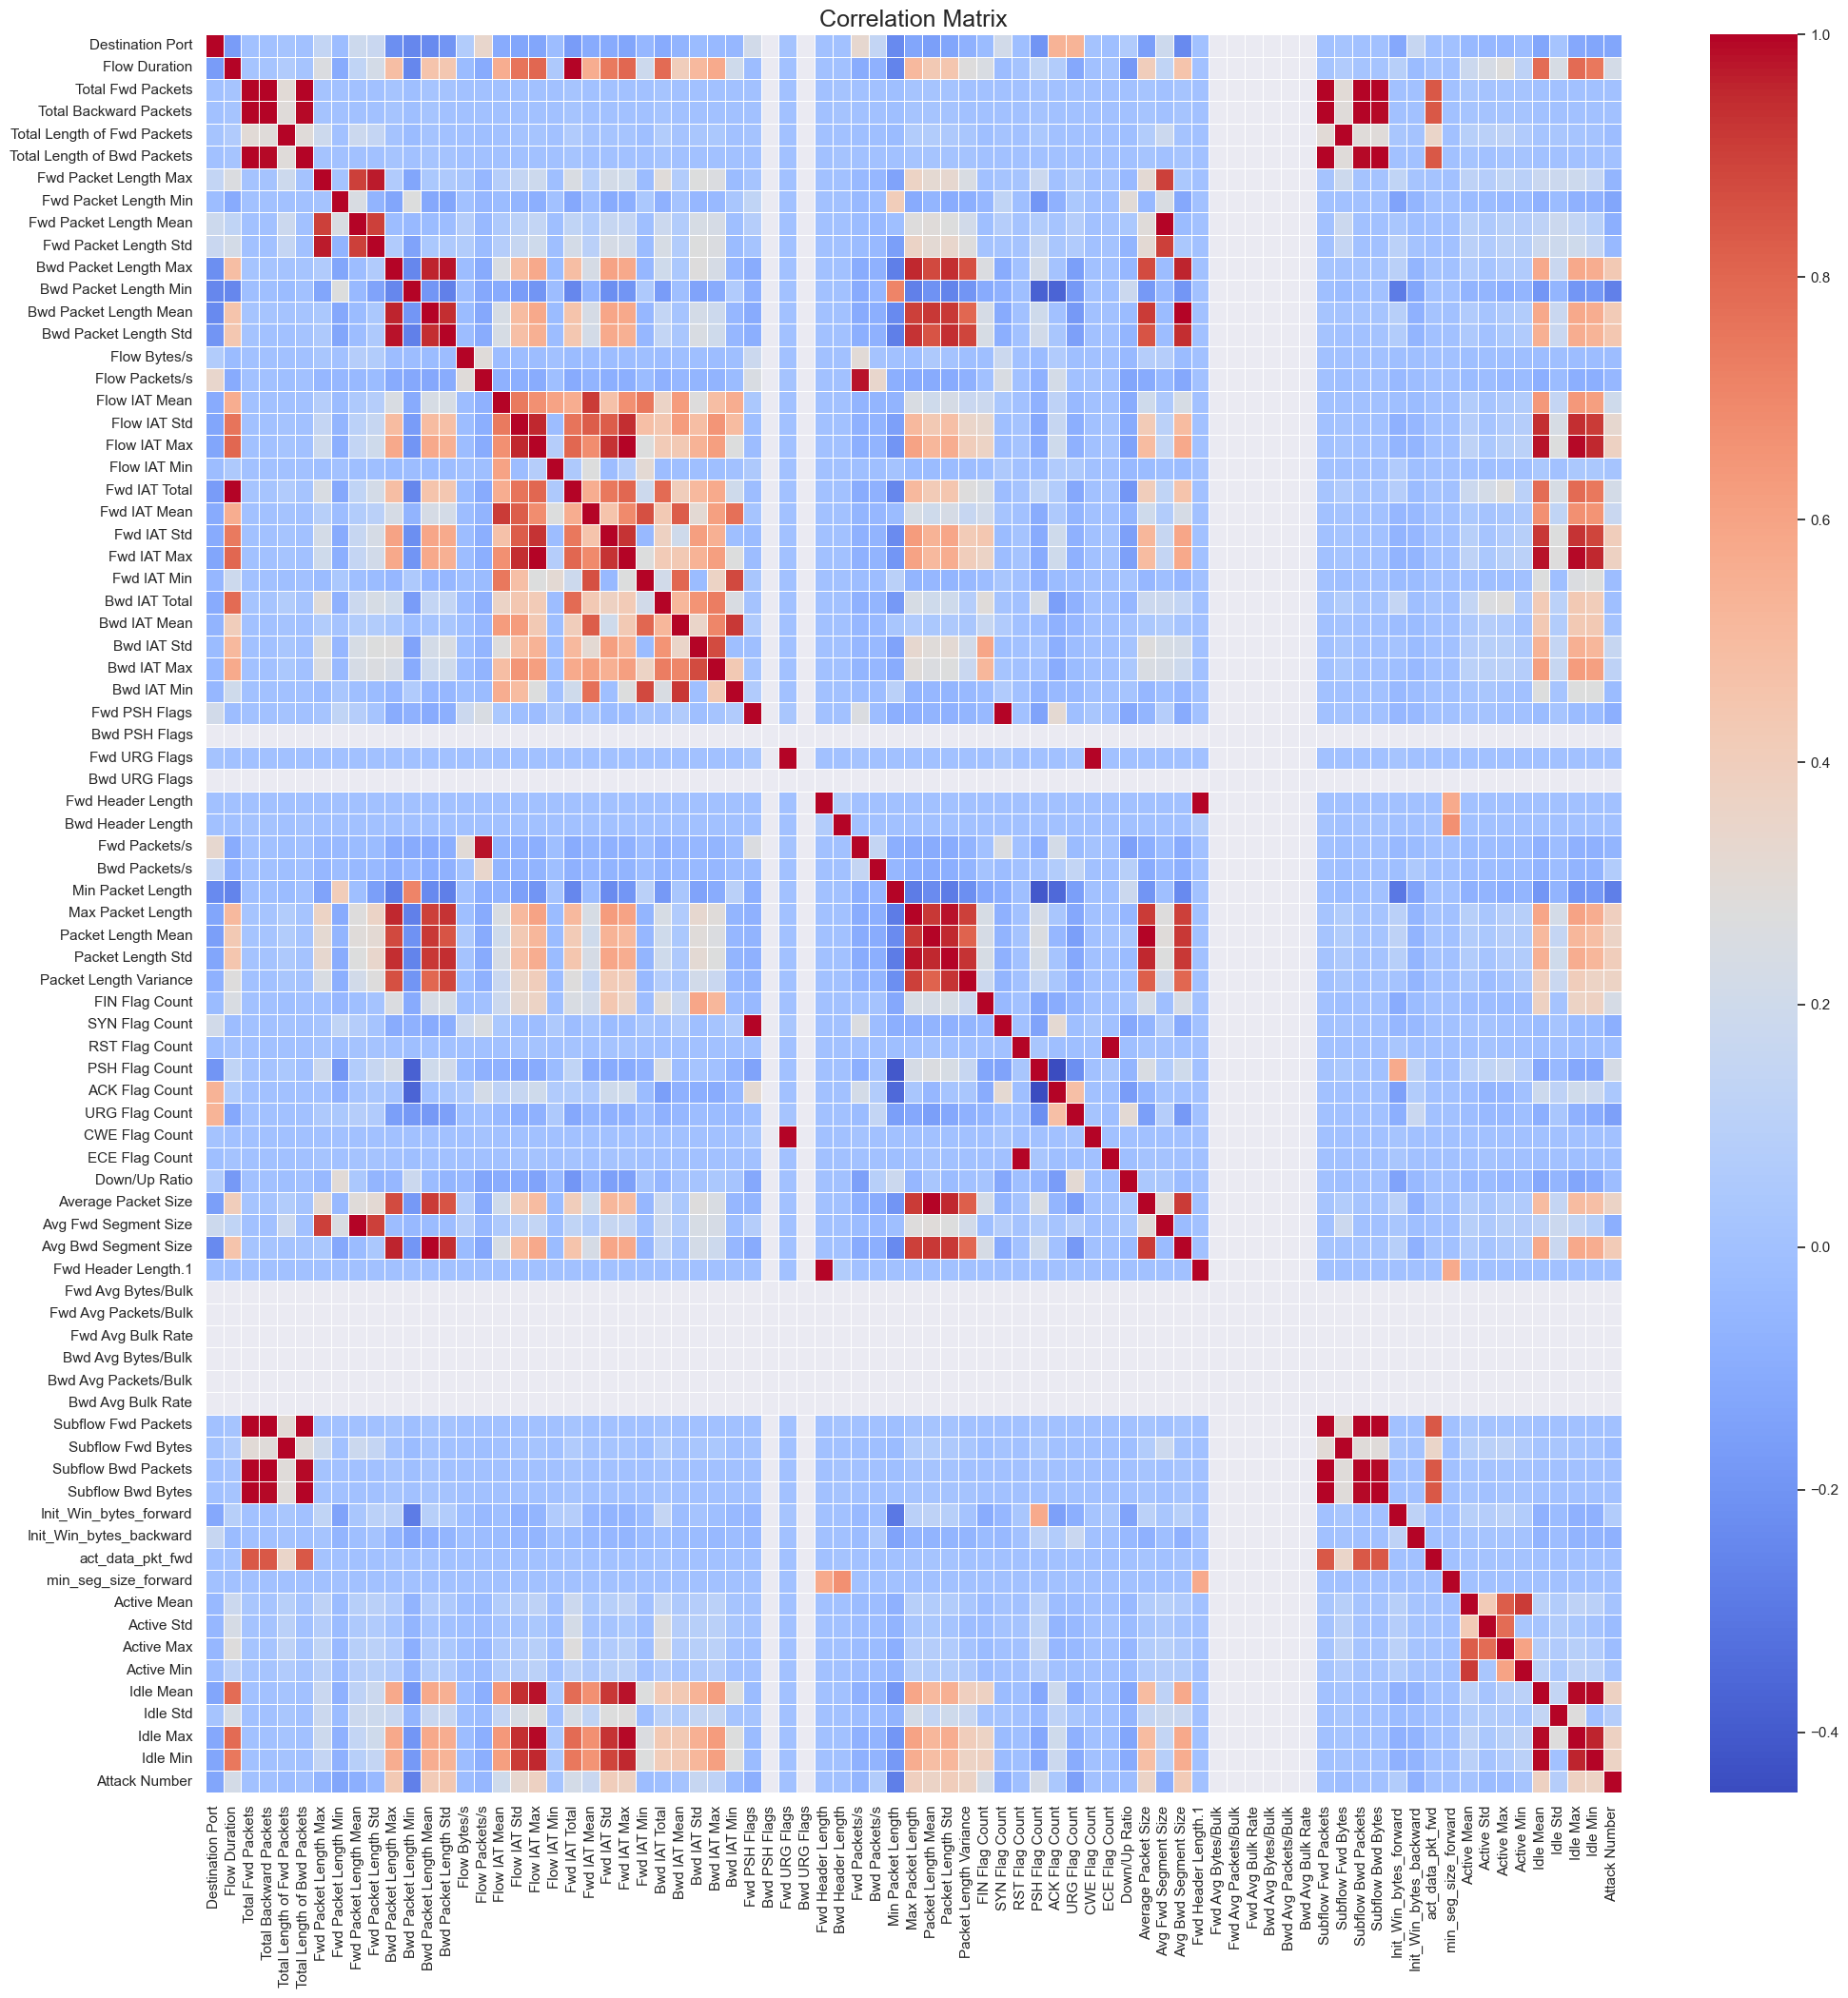

In [18]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [19]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

The columns with zero standard deviation have the same value in all rows. These columns don't have any variance. It simply means that there is no meaningful relationship with any other columns which results in NaN correlation cofficient. These columns cannot help differentiate between the classes or groups of data. So, these zero standard deviation columns don't contribute to the correlation matrix and will appear blank in the heatmap. This can be helpful while doing data processing as we may drop the columns if we find out that these columns has no variation.

# **Part 3**

**Data Preprocessing**

In [20]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1240.45 MB
Final memory usage: 654.90 MB


In [21]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [22]:
data.shape

(2019730, 72)

**Applying PCA to reduce dimensions**

A simple and effective way to reduce the dimensionality of the dataset and improve the performance of the model is to use strongly correlated features. We used label encoding on the target feature where the numerical values assigned to each category do not have inherent meaning and they are arbitrary. For this reason, the correlation matrix calculated using label-encoded variables may not accurately reflect the true relationships between the variables.

In [23]:
# We applied StandardScaler before performing Incremental PCA to standardize the data values into a standard format.

# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Incremental PCA is a variant of PCA that allows for the efficient computation of principal components of a large dataset that cannot be stored in memory.

In [24]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)

Interrupt kernel for below code snippet after 120 seconds

In [25]:
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

In [26]:
print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.23%


In [27]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-2.209732,-0.048687,0.387740,-0.024254,1.083398,0.009316,-0.013915,-0.738276,-0.386436,2.060053,-0.184068,0.604323,0.504827,-0.068480,0.892649,-0.223006,0.097125,0.304844,-0.398616,0.029306,-0.420871,0.870371,-0.269020,0.351229,0.387208,0.028063,-0.282102,-0.837759,-1.481407,1.015410,-0.432021,-0.429551,0.090536,0.000487,-0.035562,BENIGN
1,-1.855529,0.050642,-0.424053,-0.039555,-0.717002,1.179664,0.061725,0.792608,-1.592118,-0.461168,-0.090039,-0.160765,-0.743806,-0.113474,-0.535894,0.184176,-0.068860,-0.509461,0.269007,-0.042704,0.123341,0.209362,-0.113448,-0.271717,1.046586,-0.113015,-0.340046,-0.308256,0.390449,0.520617,-0.046114,0.436417,-0.108647,0.001362,0.011163,BENIGN
2,-0.120263,0.327697,-1.893310,2.464509,-1.061654,-0.198659,0.080697,1.556421,-1.455671,-0.326179,-0.126810,-0.169206,-0.775217,-0.176040,-0.905145,0.102496,-0.023984,-0.596924,-0.019985,0.157136,-0.110326,-0.159570,0.034371,-0.022876,0.995624,-0.213074,-0.523312,-0.087229,0.094175,0.506991,-0.117739,-0.015884,0.016379,0.001547,0.071035,BENIGN
3,0.053017,0.327867,-2.153013,1.534838,-1.024254,0.086036,0.078253,1.575842,-1.320721,-0.317692,-0.129353,-0.150980,-0.765779,-0.077604,-0.544843,0.048424,-0.001859,-0.517773,-0.165079,0.031148,-0.081266,-0.065998,-0.283685,-0.131248,1.055298,-0.133712,-0.415589,-0.168169,0.119089,0.529346,-0.015710,0.300889,-0.056845,0.001922,0.140371,BENIGN
4,-0.045354,0.338386,-1.946542,2.681406,-1.087056,-0.311365,0.081692,1.591179,-1.453681,-0.317795,-0.128802,-0.169456,-0.774320,-0.207194,-0.953843,0.108359,-0.026135,-0.610960,-0.018455,0.151695,-0.143451,-0.185762,0.055595,-0.017423,0.997271,-0.215213,-0.537180,-0.075702,0.085488,0.501508,-0.135268,-0.058851,0.025592,0.001470,0.056530,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019725,-2.378719,-0.041187,0.498415,0.577392,2.273183,0.074483,-0.013943,-0.732794,-0.546131,2.642770,-0.268155,0.676140,1.406598,0.085241,1.122088,-0.365706,0.162132,0.424011,-0.586875,0.026552,-0.558501,0.704207,-0.590838,0.148900,0.407353,0.125720,0.822224,0.449899,0.657475,0.762505,0.073769,0.106099,-0.046245,0.001680,0.008527,BENIGN
2019726,-2.375719,-0.041100,0.497244,0.575136,2.253257,0.067890,-0.014043,-0.737930,-0.545146,2.652359,-0.268271,0.682467,1.378470,0.069352,1.140559,-0.370280,0.164930,0.413643,-0.618246,0.038246,-0.569371,0.727047,-0.583865,0.120503,0.396020,0.119240,0.826556,0.452911,0.656232,0.763613,0.074494,0.107117,-0.046448,0.001686,0.009096,BENIGN
2019727,-2.375044,-0.041081,0.496977,0.574599,2.248770,0.066425,-0.014066,-0.739068,-0.544917,2.654444,-0.268291,0.683863,1.372185,0.065825,1.144634,-0.371283,0.165545,0.411340,-0.625180,0.040833,-0.571772,0.732117,-0.582303,0.114229,0.393511,0.117800,0.827444,0.453496,0.655822,0.763874,0.074622,0.107309,-0.046484,0.001687,0.009219,BENIGN
2019728,-2.209928,-0.037892,0.375314,0.288834,1.797070,0.471424,-0.004362,-0.311952,-0.458095,1.103461,-0.060165,0.207101,-0.098827,0.071598,-0.076225,-0.531004,0.271276,-0.261046,-1.042576,-0.159100,-0.598444,-0.067079,-0.353862,-0.528394,0.569360,0.799985,0.739696,0.669217,1.638123,-1.015694,0.365300,0.183573,-0.021161,0.002072,0.017173,BENIGN


In [28]:
# Specify the file path where you want to save the preprocessed data
output_path =base_path+"basepreprocessed_data.csv"

# Save the DataFrame as a CSV file
new_data.to_csv(output_path, index=False)

print(f"Preprocessed data saved successfully ")


Preprocessed data saved successfully 


# **4. Machine Learning Models**

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

We know that a balanced dataset is crucial in machine learning because it ensures that each class or category of data is represented equally. This means that the number of observations in each class is roughly the same which prevents the model from being biased toward the majority class. A biased dataset can lead to poor model performance, as the model may have difficulty predicting the minority classes. 

**Creating a balanced dataset for Binary Classification**

The labels for the `Attack Type` column are defined as follows:

- **`0`**: Represents **BENIGN** traffic, indicating normal, non-malicious activity.
- **`1`**: Represents **intrusions**, indicating malicious activity (any attack type that is not `BENIGN`).

In [30]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

0    7509
1    7491
Name: Attack Type, dtype: int64


In [31]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)
     

## **Logistic Regression (Binary Classification)**

**Parameters:**

`max_iter`: this parameter sets the maximum number of iterations for the solver to converge. The default value is set to 100. However, our model could not converge with only 100 iterations so we increased it to our desire.

`C`: This parameter is the regularization strength and controls the trade-off between fitting the training data well and avoiding overfitting. A smaller value of C specifies stronger regularization. We used a lower value for one model and higher value on other to see how the models perform in avoiding overfitting after placing high and low importance respectively.

`solver`: This parameter specifies the algorithm to use in the optimization problem when fitting the logistic regression model. There are several different solver algorithms available such as lbfgs, saga, liblinear and a few more. We went with 'saga' and 'sag' to train our models.

`random_state`: This is to ensure that the output is deterministic and can be reproduced.

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr.fit(X_train_bc, y_train_bc)

cv_lr = cross_val_score(lr, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr)))
print(f'\nMean cross-validation score: {cv_lr.mean():.2f}')

Logistic regression Model

Cross-validation scores: 0.9973333333333333, 0.9982222222222222, 1.0, 0.9986666666666667, 0.9986666666666667

Mean cross-validation score: 1.00


The **cross-validation scores** represent the accuracy of the **logistic regression** model on different subsets (folds) of the training dataset during a 5-fold cross-validation.

The **coefficients** and **intercept** of a logistic regression model define the decision boundary (or the hyperplane in high-dimensional space) used to classify the data.

- A **positive coefficient** means the feature increases the likelihood of the sample belonging to the positive class (here, `1` - malicious activity).
- A **negative coefficient** means the feature decreases that likelihood.

The intercept (`lr.intercept_`) is the model's bias term. It represents the base prediction when all feature values are zero. This value shifts the decision boundary.

In [33]:
print('Logistic Regression Model coefficients:')
print(*lr.coef_, sep = ', ')
print('\nLogistic Regression Model intercept:', *lr.intercept_)

Logistic Regression Model coefficients:
[ 9.27309643e-01 -2.05118000e-02 -1.08414316e+00 -9.31751890e-01
  7.22981582e-01  7.18372390e-01  1.58406744e-02  2.37436300e-01
 -1.13735761e+00  6.97405670e-01 -1.99425080e-01  7.82156953e-02
 -1.55442960e-01  7.33743467e-01 -3.62409236e-01  1.77047263e+00
 -8.02672456e-01 -1.83173133e+00  2.76019039e+00 -3.22819192e+00
 -1.46187876e+00  5.10244247e-01  3.46309687e+00 -1.25557125e+00
 -2.29142527e+00  4.70630700e-01  4.59882271e+00  5.32730123e-01
 -2.11418181e+00  2.93816349e-01  1.79211477e-01 -5.20285796e-01
  3.10945430e-02 -1.34966616e-03  2.30596668e-01]

Logistic Regression Model intercept: -2.7278230476212166


In [34]:
# Make predictions on the test set
y_pred_lr = lr.predict(X_test_bc)

# Generate classification report
report = classification_report(y_test_bc, y_pred_lr)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1825
           1       1.00      1.00      1.00      1925

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



In [35]:
import joblib

# Save the model to a file
model_filename = 'logistic_regression_model.joblib'
joblib.dump(lr, model_filename)

print(f'Model saved to {model_filename}')

Model saved to logistic_regression_model.joblib


In [36]:
'''
# Load model through JobLib
# Load the model from the file
loaded_model = joblib.load(model_filename)

# Example of making predictions
predictions = loaded_model.predict(X_test_bc)
print(predictions)
'''

'\n# Load model through JobLib\n# Load the model from the file\nloaded_model = joblib.load(model_filename)\n\n# Example of making predictions\npredictions = loaded_model.predict(X_test_bc)\nprint(predictions)\n'

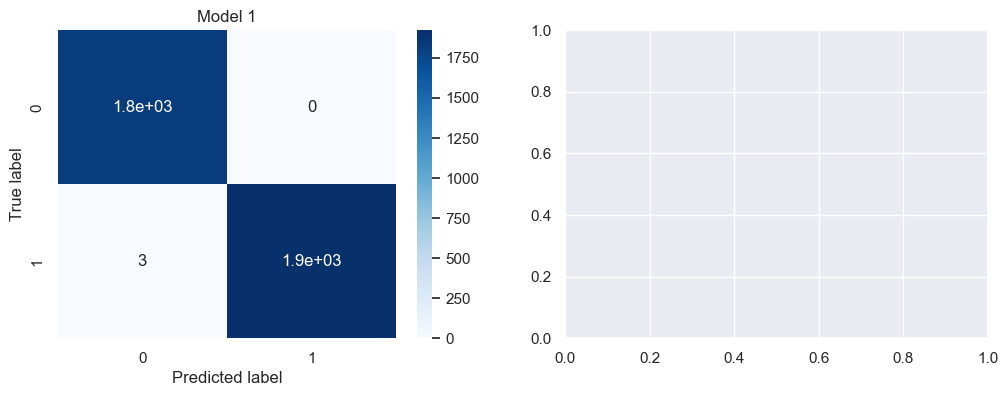

In [37]:
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve

y_pred_lr = lr.predict(X_test_bc)

conf_matrix_model = confusion_matrix(y_test_bc, y_pred_lr)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')


axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
plt.show()

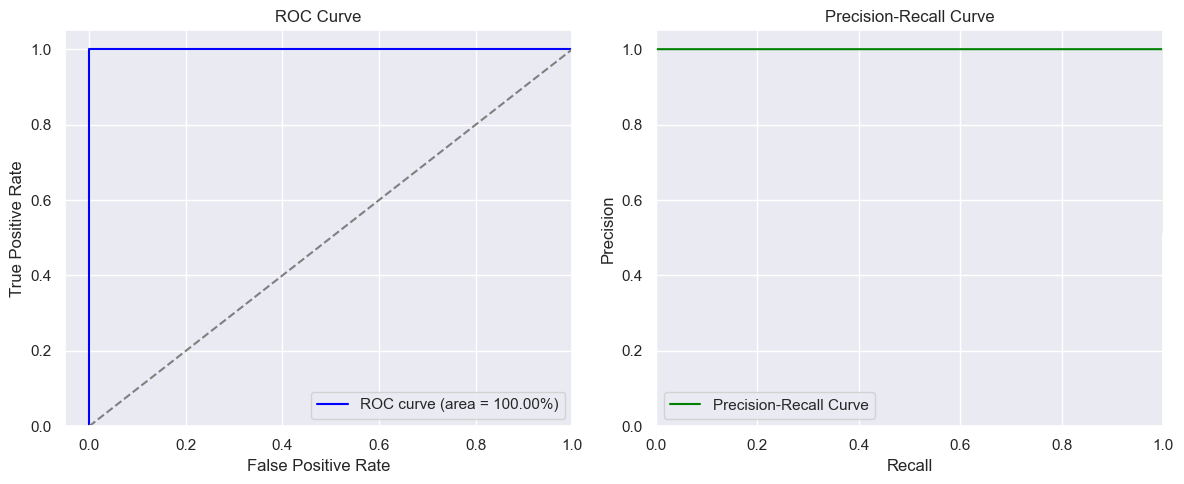

In [38]:
# Calculating probabilities and metrics for a single model
y_prob_lr = lr.predict_proba(X_test_bc)[:, 1] 

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bc, y_prob_lr)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_bc, y_prob_lr)

# Plotting both curves
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC Curve
axs[0].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2%})', color='blue')
axs[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0].set_xlim([-0.05, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC Curve')
axs[0].legend(loc='lower right')

# Plot Precision-Recall Curve
axs[1].plot(recall, precision, color='green', label='Precision-Recall Curve')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve')
axs[1].legend(loc='lower left')

plt.tight_layout()
plt.show()

## **Support Vector Machine (Binary Classification)**

**Parameters:**
`kernel`: The kernel parameter specifies the type of kernel function to use. In this case, we have used rbf and poly kernel.

`C`: The C parameter controls the trade-off between maximizing the margin and minimizing the classification error.

`gamma`: The gamma parameter is a hyperparameter that determines the influence of a single training example on the decision boundary.

`random_state`: This is to ensure that the output is deterministic and can be reproduced.

In [39]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm.fit(X_train_bc, y_train_bc)

cv_svm = cross_val_score(svm, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm)))
print(f'\nMean cross-validation score: {cv_svm.mean():.2f}')
print('SVM Model intercept:', *svm.intercept_)

Support Vector Machine Model

Cross-validation scores: 0.996, 0.9955555555555555, 0.9968888888888889, 0.9955555555555555, 0.996

Mean cross-validation score: 1.00
SVM Model intercept: -0.4200159998573485


In [40]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test_bc)

# Generate classification report
report = classification_report(y_test_bc, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1825
           1       1.00      1.00      1.00      1925

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



In [41]:
import joblib

# Save the SVM model to a file using joblib
svm_model_filename = 'svm_model.joblib'
joblib.dump(svm, svm_model_filename)

print(f'SVM model saved to {svm_model_filename}')

SVM model saved to svm_model.joblib


In [42]:
'''
# Load the Model
# Load the SVM model from the file
loaded_svm = joblib.load(svm_model_filename)

# Example of making predictions
predictions = loaded_svm.predict(X_test_bc)
print(predictions)
'''

'\n# Load the Model\n# Load the SVM model from the file\nloaded_svm = joblib.load(svm_model_filename)\n\n# Example of making predictions\npredictions = loaded_svm.predict(X_test_bc)\nprint(predictions)\n'

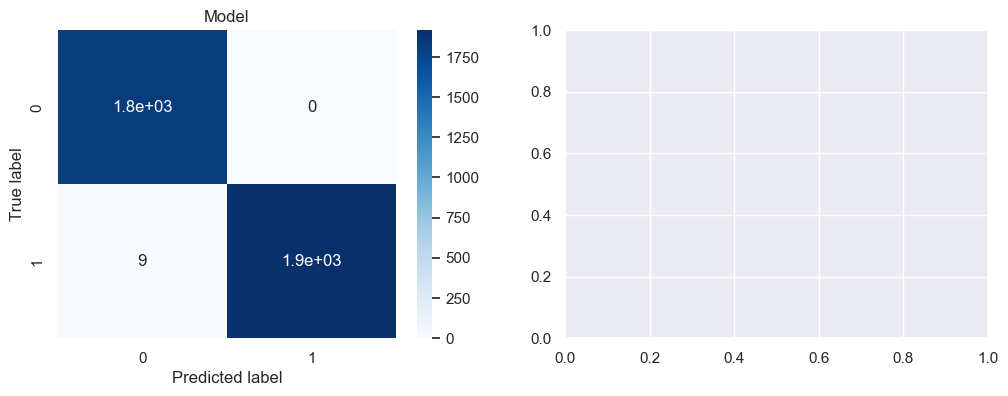

In [43]:
y_pred_svm = svm.predict(X_test_bc)

conf_matrix_model = confusion_matrix(y_test_bc, y_pred_svm)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
plt.show()

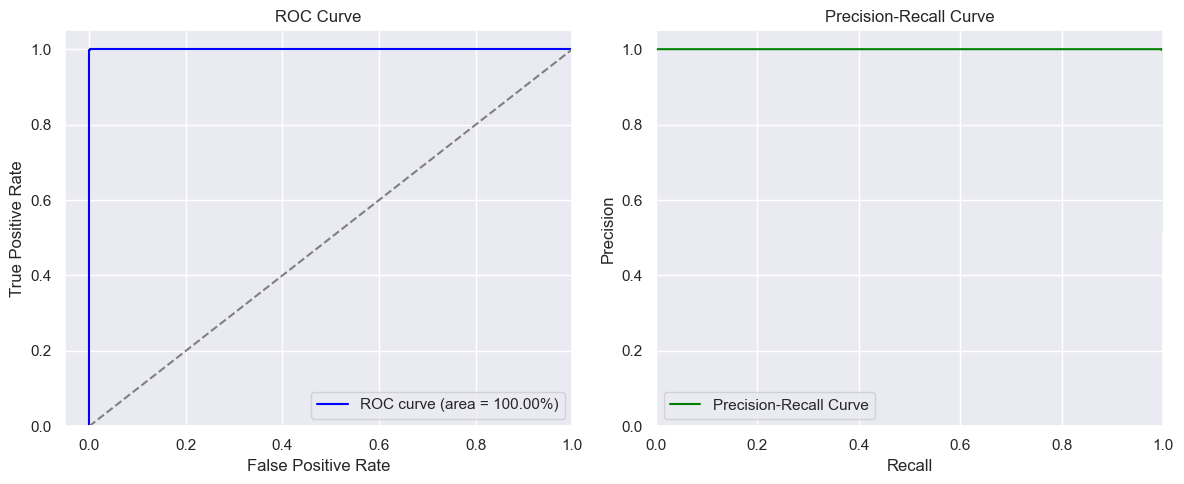

In [44]:
# Calculate probabilities and metrics for a single model
y_prob_svm = svm.predict_proba(X_test_bc)[:, 1]  # Use the probabilities predicted by the SVM model

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bc, y_prob_svm)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_bc, y_prob_svm)

# Plotting both curves
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC Curve
axs[0].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2%})', color='blue')
axs[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0].set_xlim([-0.05, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC Curve')
axs[0].legend(loc='lower right')

# Plot Precision-Recall Curve
axs[1].plot(recall, precision, color='green', label='Precision-Recall Curve')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve')
axs[1].legend(loc='lower left')

plt.tight_layout()
plt.show()

**Creating a balanced dataset for Multi-Class Classification**

The following dataset is highly imbalanced, we took the help of **SMOTE (Synthetic Minority Over-sampling Technique)** to upsample the minority classes while creating a balanced dataset for multi-class classification. This helped us in creating an overall balanced dataset to feed the classification models.

In [45]:
new_data['Attack Type'].value_counts()

BENIGN          1593852
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: Attack Type, dtype: int64

Ensures a more balanced dataset by controlling the number of samples per class.

In [46]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

BENIGN         5000
DoS            5000
DDoS           5000
Port Scan      5000
Brute Force    5000
Web Attack     2143
Bot            1953
Name: Attack Type, dtype: int64

Combines the upsampled features and labels into a new DataFrame (`blnc_data`).

In [47]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

DoS            5000
Brute Force    5000
Bot            5000
BENIGN         5000
Port Scan      5000
DDoS           5000
Web Attack     5000
Name: Attack Type, dtype: int64

In [48]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

## **Random Forest Classifier**

**Parameters:**

`n_estimators`: This parameter specifies the number of decision trees to fit in the random forest.

`max_depth`: This parameter specifies the maximum depth of each decision tree in the random forest.

`max_features`: This parameter specifies the number of features to consider when looking for the best split in each tree.

`random_state`: This is to ensure that the output is deterministic and can be reproduced.

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf.fit(X_train, y_train)

cv_rf = cross_val_score(rf, X_train, y_train, cv = 5)
print('Random Forest Model')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf)))
print(f'\nMean cross-validation score: {cv_rf.mean():.2f}')

Random Forest Model

Cross-validation scores: 0.9954285714285714, 0.992, 0.9942857142857143, 0.9944761904761905, 0.9950476190476191

Mean cross-validation score: 0.99


In [50]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

      BENIGN       0.99      0.99      0.99      1284
         Bot       0.99      1.00      1.00      1234
 Brute Force       1.00      1.00      1.00      1243
        DDoS       0.99      1.00      0.99      1193
         DoS       0.99      0.99      0.99      1209
   Port Scan       1.00      1.00      1.00      1261
  Web Attack       1.00      1.00      1.00      1326

    accuracy                           0.99      8750
   macro avg       0.99      0.99      0.99      8750
weighted avg       0.99      0.99      0.99      8750



In [51]:
import joblib

# Save the Random Forest model to a file using joblib
rf_model_filename = 'random_forest_model.joblib'
joblib.dump(rf, rf_model_filename)

print(f'Random Forest model saved to {rf_model_filename}')

Random Forest model saved to random_forest_model.joblib


In [52]:
'''
# Load the Random Forest model from the file
loaded_rf = joblib.load(rf_model_filename)

# Example of making predictions
predictions = loaded_rf.predict(X_test)
print(predictions)
'''

'\n# Load the Random Forest model from the file\nloaded_rf = joblib.load(rf_model_filename)\n\n# Example of making predictions\npredictions = loaded_rf.predict(X_test)\nprint(predictions)\n'

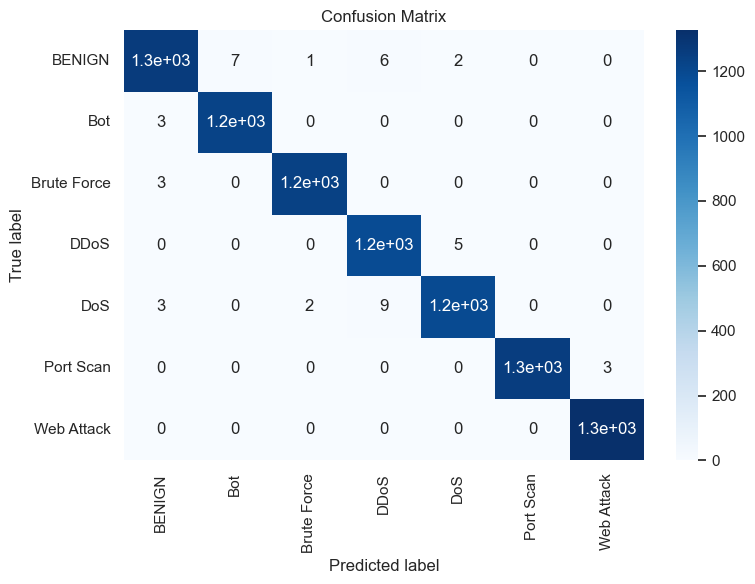

In [53]:
# Predicting using the first random forest model
y_pred_rf = rf.predict(X_test)

# Generating the confusion matrix for model 1
conf_matrix_model = confusion_matrix(y_test, y_pred_rf)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_model, annot=True, cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

## **Decision Tree Classifier**

**Parameters:**

`max_depth`: This parameter specifies the maximum depth of the tree.


In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(X_train, y_train)

cv_dt = cross_val_score(dt, X_train, y_train, cv = 5)
print('Decision Tree Model')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt)))
print(f'\nMean cross-validation score: {cv_dt.mean():.2f}')

Decision Tree Model

Cross-validation scores: 0.9921904761904762, 0.9857142857142858, 0.9893333333333333, 0.9900952380952381, 0.9878095238095238

Mean cross-validation score: 0.99


In [55]:
# Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_dt)
print(report)

              precision    recall  f1-score   support

      BENIGN       0.99      0.97      0.98      1284
         Bot       0.99      0.99      0.99      1234
 Brute Force       0.99      1.00      0.99      1243
        DDoS       0.98      0.99      0.99      1193
         DoS       0.98      0.98      0.98      1209
   Port Scan       0.99      1.00      1.00      1261
  Web Attack       1.00      1.00      1.00      1326

    accuracy                           0.99      8750
   macro avg       0.99      0.99      0.99      8750
weighted avg       0.99      0.99      0.99      8750



In [56]:
import joblib

# Save the Decision Tree model to a file using joblib
dt_model_filename = 'decision_tree_model.joblib'
joblib.dump(dt, dt_model_filename)

print(f'Decision Tree model saved to {dt_model_filename}')

Decision Tree model saved to decision_tree_model.joblib


In [57]:
'''
# Load the Decision Tree model from the file
loaded_dt = joblib.load(dt_model_filename)

# Example of making predictions
predictions = loaded_dt.predict(X_test)
print(predictions)
'''

'\n# Load the Decision Tree model from the file\nloaded_dt = joblib.load(dt_model_filename)\n\n# Example of making predictions\npredictions = loaded_dt.predict(X_test)\nprint(predictions)\n'

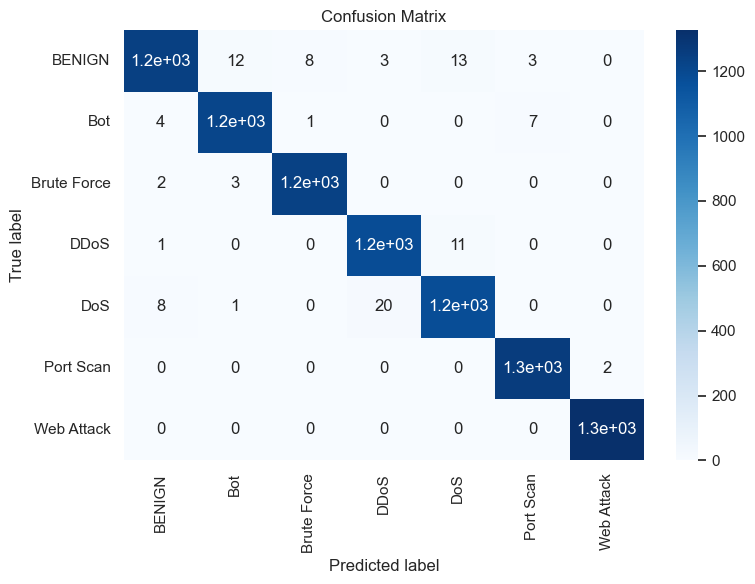

In [58]:
# Predicting using the first decision tree model
y_pred_dt = dt.predict(X_test)

# Generating the confusion matrix for model 1
conf_matrix_model = confusion_matrix(y_test, y_pred_dt)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_model, annot=True, cmap='Blues', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

## **K Nearest Neighbours**

**Parameters:**

`n_neighbors`: This is a hyperparameter of the KNN algorithm that specifies the number of neighbors to consider when making predictions for a new input data point. 

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

cv_knn = cross_val_score(knn, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn)))
print(f'\nMean cross-validation score: {cv_knn.mean():.2f}')

K Nearest Neighbors Model

Cross-validation scores: 0.9921904761904762, 0.9908571428571429, 0.9933333333333333, 0.9942857142857143, 0.9937142857142857

Mean cross-validation score: 0.99


In [60]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_knn)
print(report)

              precision    recall  f1-score   support

      BENIGN       0.99      0.99      0.99      1284
         Bot       0.99      1.00      1.00      1234
 Brute Force       0.99      1.00      0.99      1243
        DDoS       1.00      0.99      1.00      1193
         DoS       0.99      0.99      0.99      1209
   Port Scan       1.00      1.00      1.00      1261
  Web Attack       1.00      1.00      1.00      1326

    accuracy                           1.00      8750
   macro avg       1.00      1.00      1.00      8750
weighted avg       1.00      1.00      1.00      8750



In [61]:
import joblib

# Save the KNN model to a file using joblib
knn_model_filename = 'knn_model.joblib'
joblib.dump(knn, knn_model_filename)

print(f'K Nearest Neighbors model saved to {knn_model_filename}')

K Nearest Neighbors model saved to knn_model.joblib


In [62]:
import joblib

# Save the KNN model to a file using joblib
knn_model_filename = 'knn_model.joblib'
joblib.dump(knn, knn_model_filename)

print(f'K Nearest Neighbors model saved to {knn_model_filename}')

K Nearest Neighbors model saved to knn_model.joblib


In [63]:
'''
# Load the KNN model from the file
loaded_knn = joblib.load(knn_model_filename)

# Example of making predictions
predictions = loaded_knn.predict(X_test)
print(predictions)
'''

'\n# Load the KNN model from the file\nloaded_knn = joblib.load(knn_model_filename)\n\n# Example of making predictions\npredictions = loaded_knn.predict(X_test)\nprint(predictions)\n'

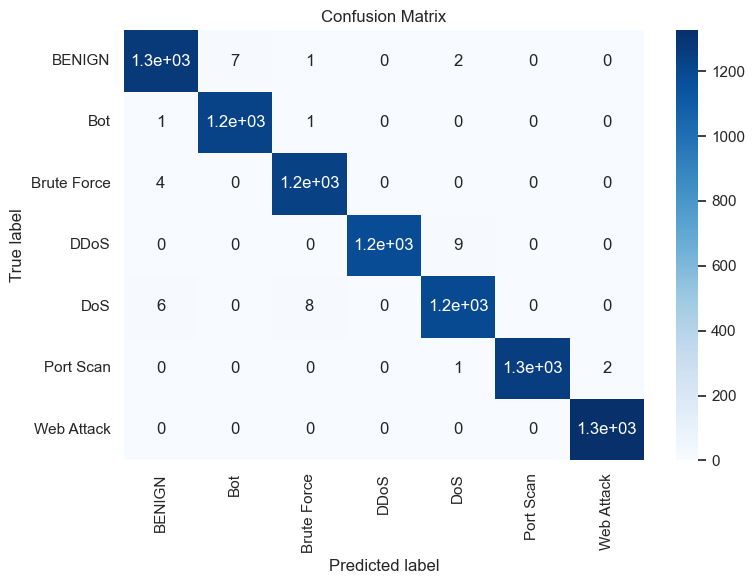

In [64]:
# Predicting using the first KNN model
y_pred_knn = knn.predict(X_test)

# Generating the confusion matrix for model 1
conf_matrix_model = confusion_matrix(y_test, y_pred_knn)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_model, annot=True, cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# **5. Performance Evaluation**

## **Machine Learning Models**

**Binary Classification Algorithms:**

In [65]:
import pandas as pd
from sklearn.metrics import classification_report

# Make predictions & Generate classification report for Logistic Regression
y_pred_lr = lr.predict(X_test_bc)
report_lr = classification_report(y_test_bc, y_pred_lr, output_dict=True)

# Make predictions & Generate classification report for Support Vector Machine
y_pred_svm = svm.predict(X_test_bc)
report_svm = classification_report(y_test_bc, y_pred_svm, output_dict=True)

# Extract relevant metrics for both models
metrics_lr = report_lr['1']  
metrics_svm = report_svm['1'] 

# Create a DataFrame to compare models
comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Support'],
    'Logistic Regression': [metrics_lr['precision'], metrics_lr['recall'], metrics_lr['f1-score'], metrics_lr['support']],
    'Support Vector Machine': [metrics_svm['precision'], metrics_svm['recall'], metrics_svm['f1-score'], metrics_svm['support']]
})

# Calculate Accuracy for both models
accuracy_lr = (y_pred_lr == y_test_bc).mean()
accuracy_svm = (y_pred_svm == y_test_bc).mean()

# Add Accuracy to the DataFrame using pd.concat
accuracy_df = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Logistic Regression': [accuracy_lr],
    'Support Vector Machine': [accuracy_svm]
})

# Concatenate the accuracy DataFrame with the comparison DataFrame
comparison_df = pd.concat([comparison_df, accuracy_df], ignore_index=True)

# Display the comparison table
print("### Binary Classification Comparison Table ###")
print(comparison_df)

### Binary Classification Comparison Table ###
      Metric  Logistic Regression  Support Vector Machine
0  Precision             1.000000                1.000000
1     Recall             0.998442                0.995325
2   F1-Score             0.999220                0.997657
3    Support          1925.000000             1925.000000
4   Accuracy             0.999200                0.997600


**Multi-Class Classification Algorithms:**

### Binary Classification Comparison Table ###
           Model    BENIGN       Bot  Brute Force      DDoS       DoS  \
0            KNN  0.991440  0.994350     0.991994  1.000000  0.990058   
1  Decision Tree  0.988095  0.987076     0.992783  0.980897  0.980066   
2  Random Forest  0.992952  0.994346     0.997586  0.987531  0.994176   

   Port Scan  Web Attack  Accuracy  
0    1.00000    0.998494  0.995200  
1    0.99212    0.998494  0.988686  
2    1.00000    0.997743  0.994971  


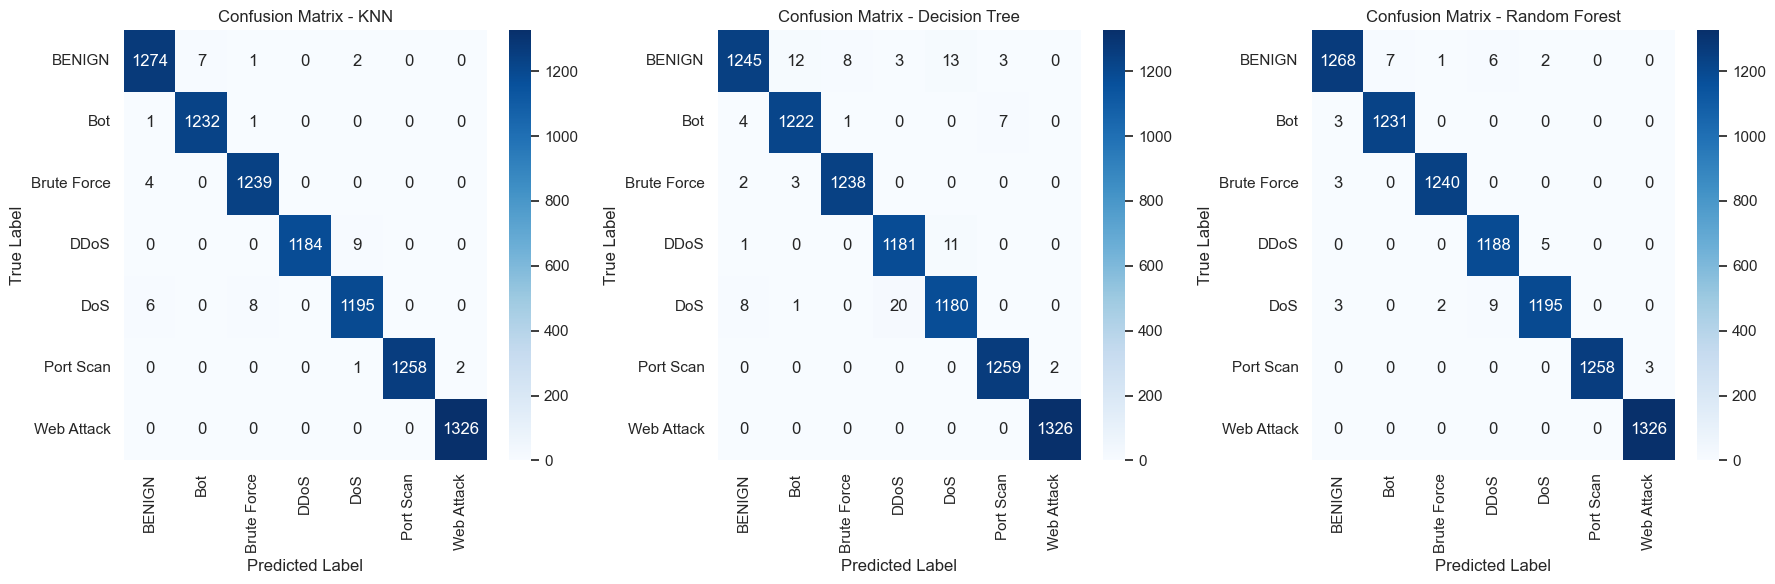

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set for KNN
y_pred_knn = knn.predict(X_test)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Make predictions on the test set for Decision Tree
y_pred_dt = dt.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Make predictions on the test set for Random Forest
y_pred_rf = rf.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract relevant metrics for all models
class_labels = ['BENIGN', 'Bot', 'Brute Force', 'DDoS', 'DoS', 'Port Scan', 'Web Attack']

# Create a DataFrame to compare models
comparison_df = pd.DataFrame(columns=['Metric'] + class_labels + ['Accuracy'])

# Fill in metrics for each model
for model_name, report in zip(['KNN', 'Decision Tree', 'Random Forest'], [report_knn, report_dt, report_rf]):
    metrics = [report[label] for label in class_labels]  # Extract metrics for each class
    accuracies = report['accuracy']  # Overall accuracy
    comparison_df.loc[len(comparison_df)] = [model_name] + [metrics[i]['precision'] for i in range(len(class_labels))] + [accuracies]

# Rename the DataFrame columns appropriately
comparison_df.columns = ['Model'] + class_labels + ['Accuracy']

# Display the comparison table
print("### Binary Classification Comparison Table ###")
print(comparison_df)

# Plotting confusion matrices and heatmaps for each model
models = {'KNN': (y_pred_knn, knn), 'Decision Tree': (y_pred_dt, dt), 'Random Forest': (y_pred_rf, rf)}
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (model_name, (y_pred, model)) in zip(axs, models.items()):
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_, ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()